C:\Users\antalb\PycharmProjects\SVM\Notebooks


,BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR,BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha,BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1,BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I,BrEPI_IL-1b/TNF-a/IFN-g_24:SRB,BrEPI_IL-1b/TNF-a/IFN-g_24:tPA,BrEPI_IL-1b/TNF-a/IFN-g_24:uPA,...,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:HLA-DR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:IL-6,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:LDLR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:M-CSF,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Proliferation,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Serum Amyloid A,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:SRB
0,0.012974,0.030109,-0.005666,0.038491,0.002644,-0.049174,0.020677,-0.014951,0.030974,0.038505,...,-0.049475,0.028892,0.002529,0.021426,-0.019332,-0.016302,0.025848,-0.012711,-0.066444,0.023466
1,0.007668,0.007110,-0.028220,0.013034,0.021347,-0.013018,0.024012,0.017691,-0.023228,-0.027401,...,-0.030431,0.029848,-0.008756,-0.066688,-0.017647,-0.039999,-0.039674,-0.030766,-0.083882,0.026187
2,-0.053134,-0.047227,0.031318,0.034482,-0.036034,0.001094,0.031372,0.017421,0.046356,-0.014702,...,0.047901,0.028042,-0.015823,-0.003801,-0.012539,-0.002839,0.049081,-0.021412,-0.054120,0.005086
3,0.034222,0.022891,-0.022771,-0.010400,-0.030099,-0.029015,0.052827,0.023350,0.004359,0.027097,...,-0.050005,-0.027179,0.011476,0.011864,0.051114,-0.013928,0.026470,0.001840,-0.061382,-0.012878
4,-0.023735,-0.008697,0.009081,0.010639,-0.011437,-0.032131,0.049397,-0.020478,0.040941,0.017646,...,0.023453,0.001179,0.028258,-0.020380,-0.073848,0.015338,-0.009739,0.034492,-0.007132,0.038432
5,-0.006126,0.055625,0.026769,-0.024158,-0.015478,0.049620,-0.025296,-0.028083,-0.035483,0.014522,...,-0.048448,-0.040901,-0.025827,0.031159,-0.030100,0.015039,0.019611,-0.043315,0.064190,-0.029232
6,0.000131,-0.047905,-0.019419,-0.024077,0.008350,0.001735,-0.051239,0.031774,-0.031519,-0.005620,...,-0.021822,-0.039178,-0.026914,-0.032121,0.069534,-0.025941,0.030266,0.015078,-0.026895,0.000841
7,-0.019612,0.009396,-0.028917,-0.021895,0.033007,-0.046802,-0.054821,-0.011130,-0.025936,0.019473,...,-0.052978,0.022550,-0.006801,0.009468,-0.063730,0.017654,-0.037805,-0.008050,0.075046,-0.004036
8,0.021021,-0.050506,0.000164,-0.007493,-0.033832,-0.023319,0.004712,0.019189,0.051267,0.006157,...,-0.019146,0.040382,0.030236,0.060852,0.001315,0.039168,-0.029709,0.024017,0.058554,0.004311
9,0.020145,0.033973,-0.030668,-0.052489,-0.013884,0.008755,-0.022963,-0.029513,-0.047132,-0.019392,...,0.060480,-0.025073,0.004123,0.067191,0.065395,0.012027,0.042209,0.029242,0.071880,0.003340


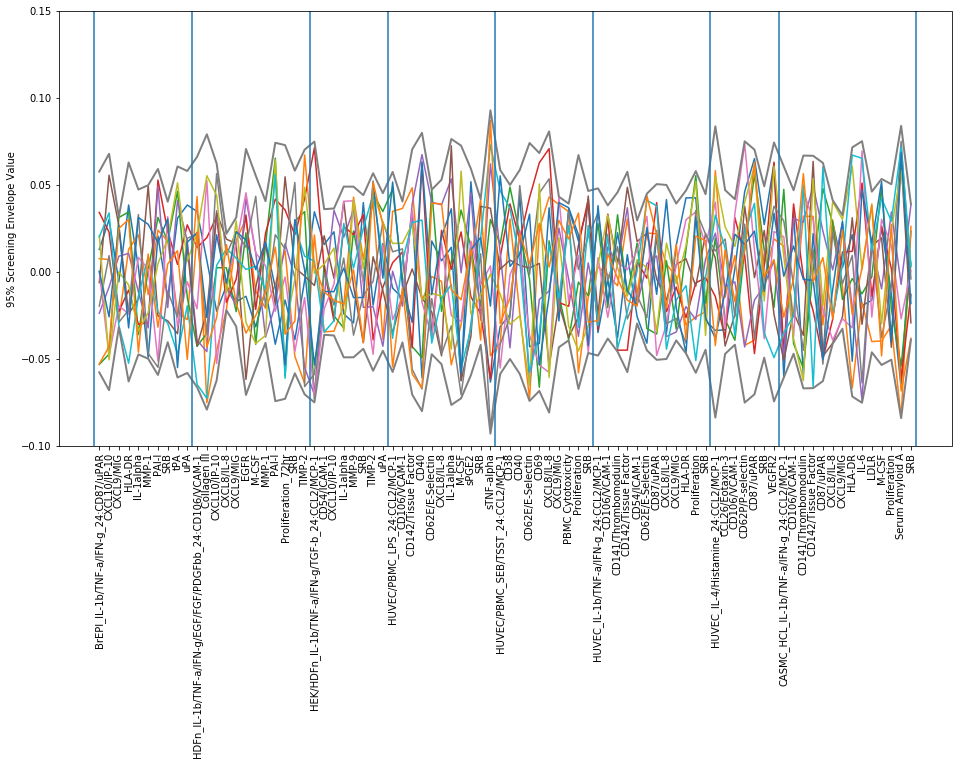

In [10]:
import numpy as np
import pandas as pd
from random_profiles import RandomProfileGenerator
import matplotlib.pyplot as plt
%matplotlib inline


import os
print(os.getcwd())

rpg = RandomProfileGenerator(envelope_file='SigEnvelopeFile.xml', data_file='SVMData.xlsx')

envelope=RandomProfileGenerator.TRUSTED 
conf=RandomProfileGenerator._95
rp_df = rpg.get_random_profiles(prof_num=12, envelope=envelope,conf=conf)
screen_envelope = rpg.get_envelope(envelope=envelope,conf=conf)

plt.figure(figsize=(16,8))
display(rp_df)

## Plot Random Profiles
system_markers = rp_df.columns.values
r_profiles = rp_df.values.tolist()
for row in r_profiles:
    # plt.scatter(x, r_profiles[rp], s=np.abs(5000*np.power(r_profiles[rp],2))) # plot controlling size
    plt.plot(range(len(row)), row) # plot controlling size
    

## Plot envelope
envelope_values = np.array([float(screen_envelope[sm]) for sm in system_markers])
x = range(len(envelope_values))
plt.plot(x, envelope_values, 
         x, -envelope_values, c='gray', linewidth=2)


x_labels = []
last_sys = ""
systems = []
v_line_positions = []

for i, sm in enumerate(system_markers):
    s,m = sm.split(':')
    #x_labels.append(m)
    if (last_sys != s):
        x_labels.append("{}:{}".format(s,m))            
        last_sys = s
        systems.append(s)
        v_line_positions.append(i)
    else:
        x_labels.append(m)
            
    
v_line_positions.append(len(system_markers))


plt.xticks(x, x_labels, rotation='vertical');
plt.ylabel('95% Screening Envelope Value');
plt.ylim(-0.1,0.15)

# add vertical lines
for lp in v_line_positions:
    plt.axvline(x=lp-0.5)